# Question 4. Is the performance linear response to dosage different between different ranges of P/Al ratios?

## Load data

Load data exported from the preprocessing session.

In [1]:
load("output/preprocessed.RData")

## Load packages

We obviously need the **`tidyverse`** package for data manipulation and plotting. **`ggthemes`** provides themes for plots. The **`nlme`** package is used for the linear mixted model. The **`broom`** package is used to create tidied **`nlme`** outputs. **`cowplot`** has the `plot_grid` function, which can create grids of ggplots.

In [2]:
library("tidyverse")
library("broom")
library("nlme")
library("ggthemes")
library("cowplot")

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'nlme'


The following object is masked from 'package:dplyr':

    collapse



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: 'cowplot'


The following object is masked from 'package:ggthemes':

    theme_map




Create P/Al categories.

In [3]:
data_rs["P/Al classes"] <- cut(data_rs$Soil_P.Al * 100, breaks = c(0, 2.5, 5, 10, 20, 30, 200))
data_rs["P/Al classes"] <- fct_recode(data_rs["P/Al classes"] %>% pull(), "(30,..." = "(30,200]")

Create P concentration categories.

In [4]:
data_rs["P M-III classes"] <- cut(data_rs$Soil.MIII.P.ICP_mg.kg, breaks = c(0, 50, 100, 200, 300, 2000))
data_rs["P M-III classes"] <- fct_recode(data_rs["P M-III classes"] %>% pull(), "(300,..." = "(300,2e+03]")

## Mixed models for each performance indices, with and withtout manure

We run (2 manure statuses X 3 performance indices X 6 P/Al levels) + (2 X 3 X 5 P-MIII levels) = 76 models. Each performance indice is ran twice (`_nomanure` and `_manure`), while maping models to P/Al classes, then P-MIII classes.

### Yield

#### P/Al

##### Without manure

In [5]:
mod_yield_P.Al_nomanure <- data_rs %>%
  filter(!is_manure) %>%
  select(Year, ID, yield_t.ha, doseP, `P/Al classes`) %>%
  drop_na() %>%
  droplevels() %>%
  split(.$`P/Al classes`) %>%
  map(~ lme(yield_t.ha ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


##### With manure

In [6]:
mod_yield_P.Al_manure <- data_rs %>%
  filter(is_manure) %>%
  select(Year, ID, yield_t.ha, doseP, `P/Al classes`) %>%
  drop_na() %>%
  filter(`P/Al classes` != "(2.5,5]") %>% # only two points
  droplevels() %>%
  split(.$`P/Al classes`) %>%
  map(~ lme(yield_t.ha ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


#### P M-III

##### Without manure

In [7]:
mod_yield_PMIII_nomanure <- data_rs %>%
  filter(!is_manure) %>%
  select(Year, ID, yield_t.ha, doseP, `P M-III classes`) %>%
  drop_na() %>%
  droplevels() %>%
  split(.$`P M-III classes`) %>%
  map(~ lme(yield_t.ha ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


##### With manure

In [8]:
mod_yield_PMIII_manure <- data_rs %>%
  filter(is_manure) %>%
  select(Year, ID, yield_t.ha, doseP, `P M-III classes`) %>%
  drop_na() %>%
  filter(`P M-III classes` != "(0,50]") %>% # few points
  droplevels() %>%
  split(.$`P M-III classes`) %>%
  map(~ lme(yield_t.ha ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


### Grain density

#### P/Al

##### Without manure

In [9]:
mod_dens_P.Al_nomanure <- data_rs %>%
  filter(!is_manure) %>%
  select(Year, ID, graindensity_g.L, doseP, `P/Al classes`) %>%
  drop_na() %>%
  droplevels() %>%
  split(.$`P/Al classes`) %>%
  map(~ lme(graindensity_g.L ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


##### With manure

In [10]:
mod_dens_P.Al_manure <- data_rs %>%
  filter(is_manure) %>%
  select(Year, ID, graindensity_g.L, doseP, `P/Al classes`) %>%
  drop_na() %>%
  filter(`P/Al classes` != "(2.5,5]") %>% # only two points
  droplevels() %>%
  split(.$`P/Al classes`) %>%
  map(~ lme(graindensity_g.L ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


#### P M-III

##### Without manure

In [11]:
mod_dens_PMIII_nomanure <- data_rs %>%
  filter(!is_manure) %>%
  select(Year, ID, graindensity_g.L, doseP, `P M-III classes`) %>%
  drop_na() %>%
  droplevels() %>%
  split(.$`P M-III classes`) %>%
  map(~ lme(graindensity_g.L ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


##### With manure

In [12]:
mod_dens_PMIII_manure <- data_rs %>%
  filter(is_manure) %>%
  select(Year, ID, graindensity_g.L, doseP, `P M-III classes`) %>%
  drop_na() %>%
  filter(`P M-III classes` != "(0,50]") %>% # few points
  droplevels() %>%
  split(.$`P M-III classes`) %>%
  map(~ lme(graindensity_g.L ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


### Grain moisture

#### P/Al

##### Without manure

In [13]:
mod_moist_P.Al_nomanure <- data_rs %>%
  filter(!is_manure) %>%
  filter(grainmoisture_perc > 10) %>%
  select(Year, ID, grainmoisture_perc, doseP, `P/Al classes`) %>%
  drop_na() %>%
  droplevels() %>%
  split(.$`P/Al classes`) %>%
  map(~ lme(grainmoisture_perc ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


##### With manure

In [14]:
mod_moist_P.Al_manure <- data_rs %>%
  filter(is_manure) %>%
  filter(grainmoisture_perc > 10) %>%
  select(Year, ID, grainmoisture_perc, doseP, `P/Al classes`) %>%
  drop_na() %>%
  filter(`P/Al classes` != "(2.5,5]") %>% # only two points
  droplevels() %>%
  split(.$`P/Al classes`) %>%
  map(~ lme(grainmoisture_perc ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


#### P M-III

##### Without manure

In [15]:
mod_moist_PMIII_nomanure <- data_rs %>%
  filter(!is_manure) %>%
  select(Year, ID, grainmoisture_perc, doseP, `P M-III classes`) %>%
  drop_na() %>%
  droplevels() %>%
  split(.$`P M-III classes`) %>%
  map(~ lme(grainmoisture_perc ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


##### With manure

In [16]:
mod_moist_PMIII_manure <- data_rs %>%
  filter(is_manure) %>%
  select(Year, ID, grainmoisture_perc, doseP, `P M-III classes`) %>%
  drop_na() %>%
  filter(`P M-III classes` != "(0,50]") %>% # few points
  droplevels() %>%
  split(.$`P M-III classes`) %>%
  map(~ lme(grainmoisture_perc ~ doseP,
            random = ~ 1|Year/ID,
            data = .)) %>%
  map_dfr(~tidy(fixef(.)), .id = 'source')

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


Model statistics are binded in two tables, with and without manure.

In [17]:
mod_stats_P.Al_nomanure <- bind_rows(`Grain yield (Mg/ha)` = mod_yield_P.Al_nomanure,
                                `Bulk density (g/L)` = mod_dens_P.Al_nomanure,
                                `Grain moist. content (%)` = mod_moist_P.Al_nomanure, .id = "perf_indice") %>%
  spread(names, x) %>%
  rename(`P/Al classes` = source)
mod_stats_P.Al_nomanure$`P/Al classes` <- factor(mod_stats_P.Al_nomanure$`P/Al classes`, levels = levels(data_rs$`P/Al classes`))

In [18]:
mod_stats_P.Al_manure <- bind_rows(`Grain yield (Mg/ha)` = mod_yield_P.Al_manure,
                              `Bulk density (g/L)` = mod_dens_P.Al_manure,
                              `Grain moist. content (%)` = mod_moist_P.Al_manure, .id = "perf_indice") %>%
  spread(names, x) %>%
  rename(`P/Al classes` = source)
mod_stats_P.Al_manure$`P/Al classes` <- factor(mod_stats_P.Al_manure$`P/Al classes`, levels = levels(data_rs$`P/Al classes`))

In [19]:
mod_stats_PMIII_nomanure <- bind_rows(`Grain yield (Mg/ha)` = mod_yield_PMIII_nomanure,
                                `Bulk density (g/L)` = mod_dens_PMIII_nomanure,
                                `Grain moist. content (%)` = mod_moist_PMIII_nomanure, .id = "perf_indice") %>%
  spread(names, x) %>%
  rename(`P M-III classes` = source)
mod_stats_PMIII_nomanure$`P M-III classes` <- factor(mod_stats_PMIII_nomanure$`P M-III classes`, levels = levels(data_rs$`P M-III classes`))
levels(data_rs$`P M-III classes`) <- paste0(levels(data_rs$`P M-III classes`), "\n(mg/kg)")
levels(mod_stats_PMIII_nomanure$`P M-III classes`) <- levels(data_rs$`P M-III classes`)

In [20]:
mod_stats_PMIII_manure <- bind_rows(`Grain yield (Mg/ha)` = mod_yield_PMIII_manure,
                              `Bulk density (g/L)` = mod_dens_PMIII_manure,
                              `Grain moist. content (%)` = mod_moist_PMIII_manure, .id = "perf_indice") %>%
  spread(names, x) %>%
  rename(`P M-III classes` = source)
mod_stats_PMIII_manure$`P M-III classes` <- factor(mod_stats_PMIII_manure$`P M-III classes`)
levels(mod_stats_PMIII_manure$`P M-III classes`) <- levels(data_rs$`P M-III classes`)[-1]

## Plot

We rename performance indices with prettier names.

In [21]:
data_rs <- data_rs %>%
  rename("Bulk density (g/L)" = 'graindensity_g.L',
         "Grain moist. content (%)" = "grainmoisture_perc",
         "Grain yield (Mg/ha)" = "yield_t.ha")

### P/Al

#### Without manure

In [22]:
nomanure_df <- data_rs %>%
  filter(!is_manure) %>%
  gather(key = "perf_indice", value = "performance", `Grain yield (Mg/ha)`, `Bulk density (g/L)`, `Grain moist. content (%)`)

The expression on the y-axis can go through a label_parser. But there seem to be a bug in ggplot that prevent doing so. The following block creates a plot with correct labels which will be copy-pasted with an image editor (GIMP).

In [23]:
nomanure_df$perf_indice <- factor(nomanure_df$perf_indice)
levels(nomanure_df$perf_indice) <- c(expression("Bulk density (g"^"-1"~"•L)"),
                                   expression("Grain moist content (%"~")"),
                                   expression("Grain yield (Mg"^"-1"~"•ha)"))

I recover the label on the following plot.

Warning message:
"Removed 1942 rows containing missing values (geom_point)."
Warning message:
"Removed 1942 rows containing missing values (geom_point)."


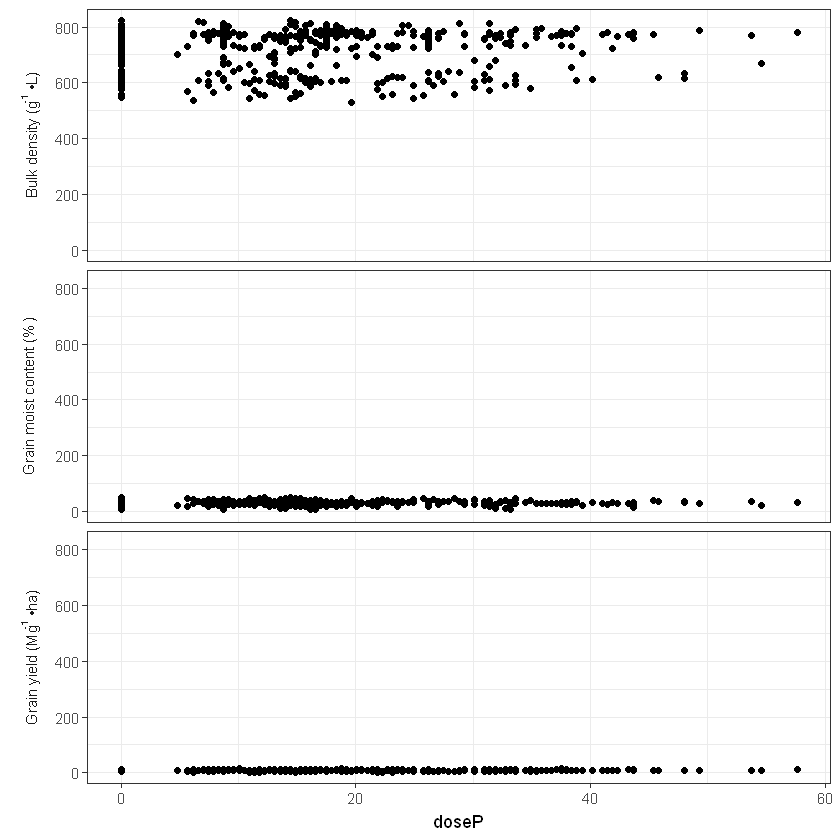

In [24]:
nomanure_df %>%
  ggplot(aes(x = doseP, y = performance)) +
  geom_point() +
  facet_grid(perf_indice ~ ., labeller = label_parsed, switch="y") +
  theme_bw() +
  theme(axis.title.y = element_blank(),
        strip.background = element_rect(fill = "transparent", colour = "transparent"),
        strip.placement = "outside",
        strip.text.y = element_text(angle=270)) +
  ggsave("images/dummy-label.png", height = 10, width = 8, dpi = 600)

And I create the plot as usual, but with incorret labels.

In [25]:
gg_nomanure <- nomanure_df %>%
  ggplot(aes(x = doseP, y = performance)) +
  geom_abline(data = mod_stats_P.Al_nomanure, aes(intercept = `(Intercept)`, slope = doseP), size = 0.75) +
  geom_point(size = 1.5, alpha = 0.5, pch = 21, fill = "white") +
  facet_grid(perf_indice ~ `P/Al classes`, scales = "free", labeller = labeller(.cols = label_both), switch="y") +
  labs(title = "Without manure", x = expression("Dose P (kg ha"^"-1"~")")) +
  expand_limits(x = c(0, 70)) +
  theme_bw() +
  theme(axis.title.y = element_blank(),
        strip.background = element_rect(fill = "transparent", colour = "transparent"),
        strip.placement = "outside",
        strip.text.y = element_text(angle=270))

#### With manure

Because their is no data in some P/Al categories, we append empty rows only filled with P/Al categories, assuring that the plot renders all categories, with empty spaces where the category is absent.

In [26]:
# tweak to force ploting the (0,2.5] category
manure_df <- data_rs %>%
  filter(is_manure) %>%
  #filter(ID != 549) %>% # moisture unusually low
  gather(key = "perf_indice", value = "performance", `Grain yield (Mg/ha)`, `Bulk density (g/L)`, `Grain moist. content (%)`) 
manure_na <- manure_df[1:nlevels(pull(data_rs["P/Al classes"])), ]
manure_na[1:nrow(manure_na), ] <- NA
manure_na[, "P/Al classes"] <- factor(levels(pull(data_rs["P/Al classes"])), levels = levels(pull(data_rs["P/Al classes"])))
manure_na["perf_indice"] <- rep("Grain yield (Mg/ha)", nlevels(pull(data_rs["P/Al classes"])))
manure_df <- bind_rows(manure_df, manure_na) %>%
  filter(!(perf_indice == "Grain moist. content (%)" & performance < 10))

The following code block is deactivated. The expressions are valid but don't seem to 

In [27]:
# plot
## options(repr.plot.width = 8, repr.plot.height = 5)
gg_manure <- manure_df %>%
  ggplot(aes(x = doseP, y = performance)) +
  geom_abline(data = mod_stats_P.Al_manure, aes(intercept = `(Intercept)`, slope = doseP), size = 0.75) +
  geom_point(size = 1.5, alpha = 0.5, pch = 21, fill = "white") +
  facet_grid(perf_indice ~ `P/Al classes`, scales = "free",
             labeller = labeller(.cols = label_both),
             switch="y") +
  labs(title = "With manure", x = expression("Dose P (kg ha"^"-1"~")")) +
  expand_limits(x = c(0, 70)) +
  theme_bw() +
  theme(axis.title.y = element_blank(),
        strip.background = element_rect(fill = "transparent", colour = "transparent"),
        strip.placement = "outside",
        strip.text.y = element_text(angle=270))

Warning message:
"Removed 1942 rows containing missing values (geom_point)."
Warning message:
"Removed 1145 rows containing missing values (geom_point)."


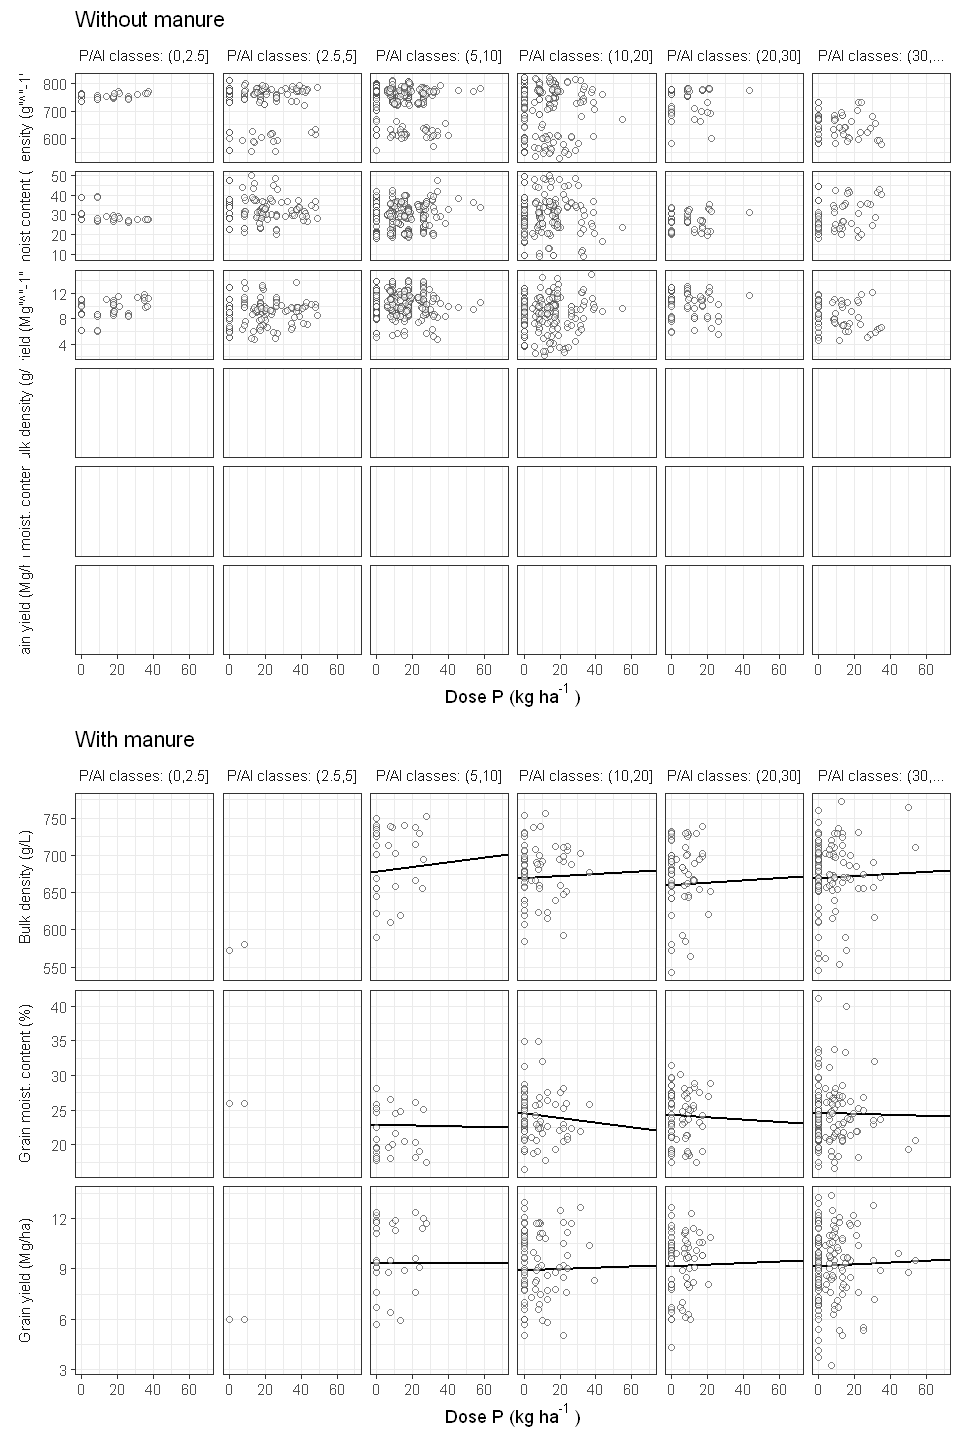

In [28]:
options(repr.plot.width = 8, repr.plot.height = 12)
plot_grid(gg_nomanure, gg_manure, ncol = 1)

In [29]:
ggsave("images/performance-p.al-cat.png", height = 10, width = 8, dpi = 600)

### P-MIII

#### Without manure

In [30]:
gg_nomanure <- data_rs %>%
  filter(!is_manure) %>%
  gather(key = "perf_indice", value = "performance", `Grain yield (Mg/ha)`, `Bulk density (g/L)`, `Grain moist. content (%)`) %>%
  ggplot(aes(x = doseP, y = performance)) +
  geom_abline(data = mod_stats_PMIII_nomanure, aes(intercept = `(Intercept)`, slope = doseP), size = 0.75) +
  geom_point(size = 1.5, alpha = 0.5, pch = 21, fill = "white") +
  facet_grid(perf_indice ~ `P M-III classes`, scales = "free", labeller=labeller(.cols = label_both), switch="y") +
  labs(title = "Without manure", x = expression("Dose P (kg ha"^"-1"~")")) +
  expand_limits(x = c(0, 70)) +
  theme_bw() +
  theme(axis.title.y = element_blank(),
        strip.background = element_rect(fill = "transparent", colour = "transparent"),
        strip.placement = "outside",
        strip.text.y = element_text(angle=270))

#### With manure

In [31]:
# plot
## options(repr.plot.width = 8, repr.plot.height = 5)
gg_manure <- data_rs %>%
  filter(is_manure) %>%
  gather(key = "perf_indice", value = "performance", `Grain yield (Mg/ha)`, `Bulk density (g/L)`, `Grain moist. content (%)`) %>%
  ggplot(aes(x = doseP, y = performance)) +
  geom_abline(data = mod_stats_PMIII_manure, aes(intercept = `(Intercept)`, slope = doseP), size = 0.75) +
  geom_point(size = 1.5, alpha = 0.5, pch = 21, fill = "white") +
  facet_grid(perf_indice ~ `P M-III classes`, scales = "free", labeller=labeller(.cols = label_both), switch="y") +
  labs(title = "With manure", x = expression("Dose P (kg ha"^"-1"~")")) +
  expand_limits(x = c(0, 70)) +
  theme_bw() +
  theme(axis.title.y = element_blank(),
        strip.background = element_rect(fill = "transparent", colour = "transparent"),
        strip.placement = "outside",
        strip.text.y = element_text(angle=270))

Warning message:
"Removed 1942 rows containing missing values (geom_point)."
Warning message:
"Removed 1703 rows containing missing values (geom_point)."


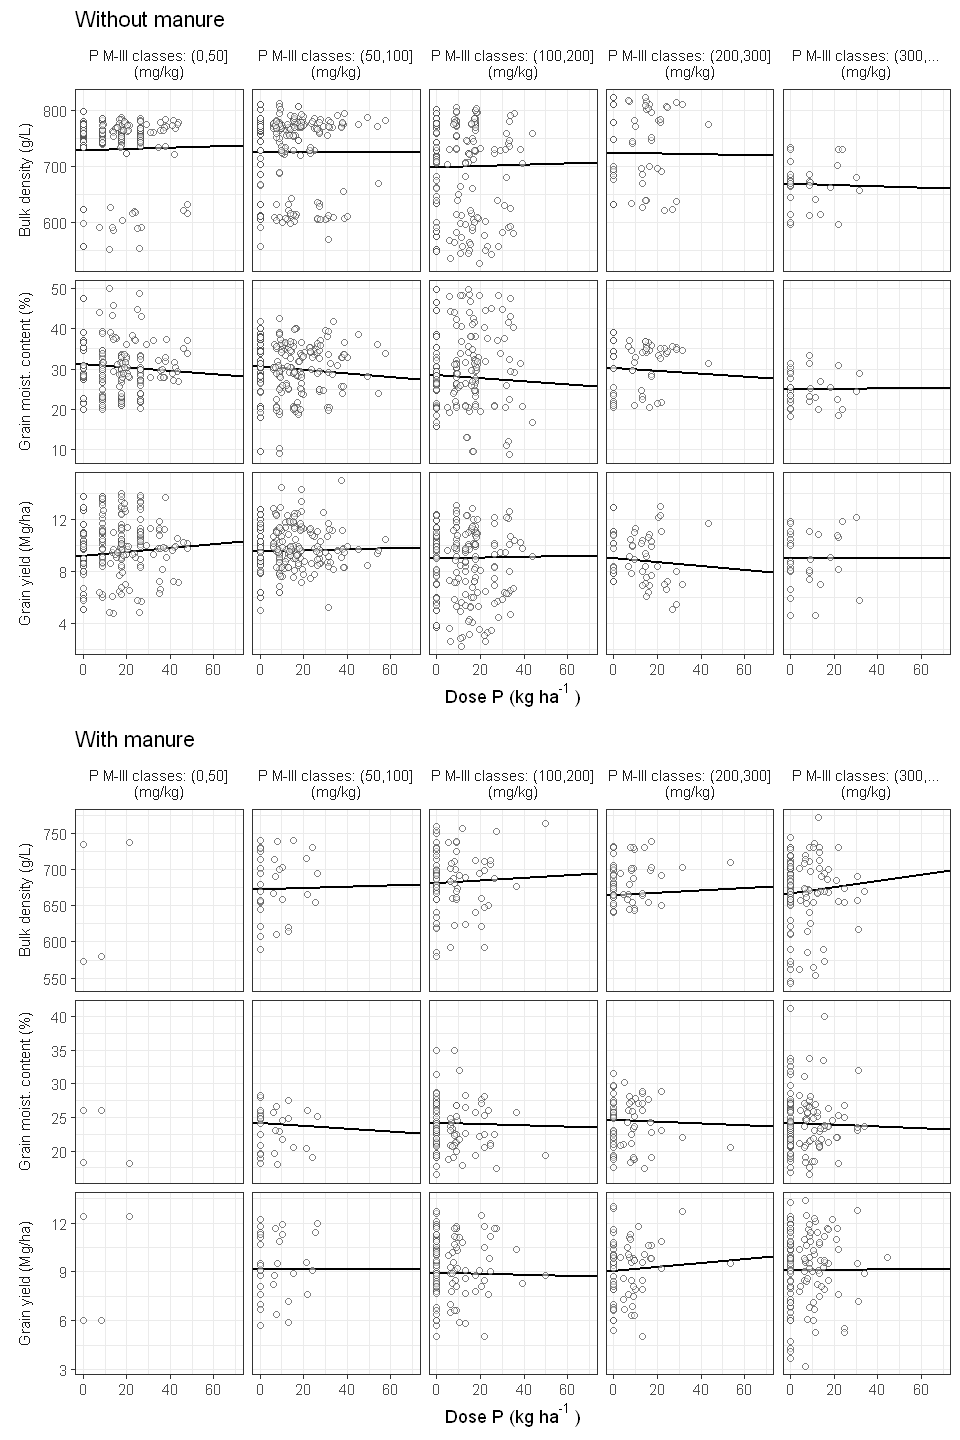

In [32]:
options(repr.plot.width = 8, repr.plot.height = 12)
plot_grid(gg_nomanure, gg_manure, ncol = 1)

In [33]:
ggsave("images/performance-p.al-cat.png", height = 10, width = 8, dpi = 600)